<a href="https://colab.research.google.com/github/ev1025/1day1commit/blob/main/%EC%BD%94%EB%93%9C%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%B8%A0/%EC%BB%B4%ED%93%A8%ED%84%B0%EA%B8%B0%EC%B4%88/Section5_Sprint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTE 1 연결리스트, 큐, 스택

https://github.com/ev1025/ds-sa-linkedlist

## ADT(Abstract Data Type)

**추상자료형**
- 기본자료형을 활용하여 사용자에 의해 구현된 자료형
- 복잡도가 높은 프로그램의 핵심을 간단하게 설명하기 위해서 사용한다.   

**이해하는데 기호의 의미가 굉장히 중요**
- 참조기호 : . (self.next)
- 삽입, 할당기호 : = (self.next = next) self.next가 next를 가르킨다(포인터)
- 코드 꼭 이 사이트에 쳐보고 보면서 할 것 https://pythontutor.com/visualize.html#


### 기본자료구조형(배열, 리스트)

#### 배열(array)

- 데이터를 나열하고 인덱스로 접근 가능한 자료형
- 직접적인 접근이 가능하기 때문에 각 값의 인덱스 번호를 알고 있다면, 데이터를 빠르게 찾을 수 있다.(직접적인접근 : 순차적으로 찾지 않고 지정한 인덱스로 바로이동)

- 데이터의 크기가 미리 정해져있는 정적 자료형으로 데이터의 추가와 삭제가 불편하다.
- 공간이 부족한 경우, 새로운 배열 생성-> 기존 데이터 이동 -> 새 데이터 추가
- 중간에 추가나 삭제한 경우 다른 데이터의 인덱스가 바뀜(시간소요)

**찾고자하는 데이터의 인덱스를 모른다면**
- 선형검색(Linear Search): 0부터 끝까지 순서대로 검색
- 이진검색(Binary Search): 정렬된 배열에서만 가능, 가운데부터 반씩 검색진행 (검색시간을 단축해줌)

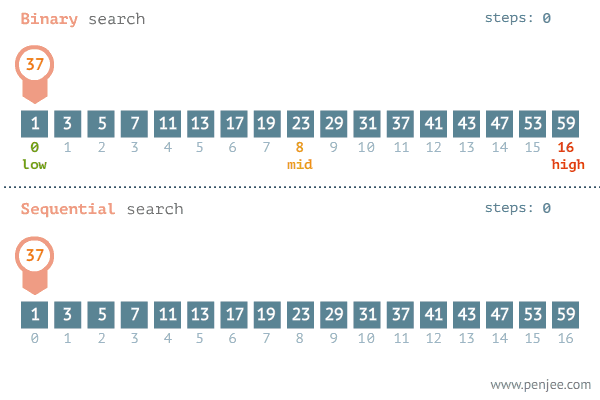

#### 리스트(List)

- 배열의 인덱스와 연결리스트의 동적인 구조를 가지기 때문에 크기가 정해져있지 않다.
- 추가와 삭제가 간편하다.
- 데이터에 직접적인 접근이 불가하여 검색 성능이 좋지않음(데이터를 순차적으로 확인)


#### 리스트와 배열의 차이

1. 선언조건    
   - 리스트는 모든 타입을보존
   - 배열은 숫자와 문자열이 섞이면 문자열로 전환

In [ ]:
import numpy as np

a = [1, 3, 5, 'a', 'b'] # 1, 3, 5는 숫자형, 'a', 'b'는 문자열

b = np.array([1, 3, 5, 'a', 'b']) # '1', '3', '5', 'a', 'b'의 문자열로 전환

2. 2차원 이상의 배열구조
   - 리스트는 원소의 개수가 달라도 됨
   - 배열은 원소 개수가 같아야 함

In [ ]:
a = [[1], [3, 5], [2, 4, 6]] # 문제 X

b = np.array([[1], [3, 5], [2, 4, 6]]) # 개수가 달라서 array 선언 불가능
# array([list([1]), list([3, 5]), list([2, 4, 6])], dtype=object)

3. 연산
   - 리스트 + 리스트 = [리스트,리스트] , 리스트*3 = [리스트,리스트,리스트]
   - 배열은 사칙연산 가능, int를 사칙연산하면 모든 인덱스에 같은값 연산

In [1]:
# 리스트 연산

a = [1, 3, 5]
b = [2, 4, 6]

a + b # [1, 3, 5, 2, 4, 6]

# 허용하지 않음 : a - b, a * b, a / b

a * 3 # [1, 3, 5, 1, 3, 5, 1, 3, 5]

[1, 3, 5, 1, 3, 5, 1, 3, 5]

In [6]:
# 넘파이 어레이 연산
import numpy as np

a = np.array([1, 3, 5])
b = np.array([2, 4, 6])

a + b # array([ 3,  7, 11])
a * b # array([ 2, 12, 30])

a + 2 # array([3, 5, 7])
a * 3 # array([ 3,  9, 15])

array([ 3,  9, 15])

### Linked-list(연결리스트)

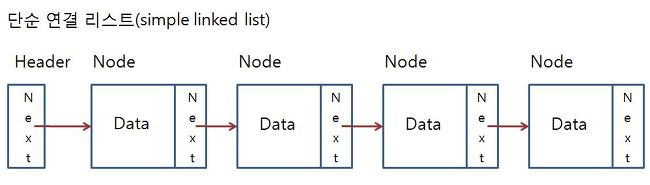

- 떨어진 곳에 존재하는 데이터를 참조기능으로 연결하여 인덱스가 존재하지 않는다.
- 동적인 데이터로 미리 공간을 할당하지 않아도 된다.
- 데이터를 순차적으로 탐색하여 느리다.
- 연결을 위한 별도의 데이터공간이 필요(next변수)하여 효율이 낮다.
- 중간 데이터를 삭제하면 앞뒤를 연결해주기만 하면 되기 때문에 빠르다.

In [ ]:
# A = B 는 A노드가 B노드를 참조(포인터)한다는 뜻!!
# 노드를 생성하는 클래스
class Node:
    def __init__(self, value):
        self.value = value # 노드의 입력값은 value이다.
        self.next = None   # 노드의 next값은 None이다. 다음노드를 참조하기 위해 비워둔다.

# 노드를 연결하는 클래스
class linked_list:
    def __init__(self, value):   # head노드 초기 생성하고 다음노드 연결하는 함수
        self.head = Node(value)  # self.head노드를 만들고 Node(value)를 참조한다.

    def add_node(self, value):      # 노드를 생성하여 연결하는 함수
        if self.head == None:       # self.head노드가 없으면, 
            self.head = Node(value) # self.head노드가 Node(value)를 참조한다.(위에 init이랑 같은거)

        else:                 # self.head노드가 있으면,
            node = self.head  # node변수가 self.head를 참조한다. 
            while node.next:  # self.head의 next개수만큼 반복문을 돌린다.(노드의 개수만큼 돌겠지?)
                node = node.next    # 반복할 때 마다 node변수의 참조를 갱신시켜서, 마지막노드의 next에 도달하면 마지막노드의 next를 참조하게 된다.(그림1번)
            node.next = Node(value) # 마지막노드의 next(None)를 새로 삽입한 Node(value)에 참조시킨다.(그림2번)


a = linked_list(0)   # head 초기화(초기값설정)

for i in range(1,3): # 1노드~2노드 삽입
    a.add_node(i)

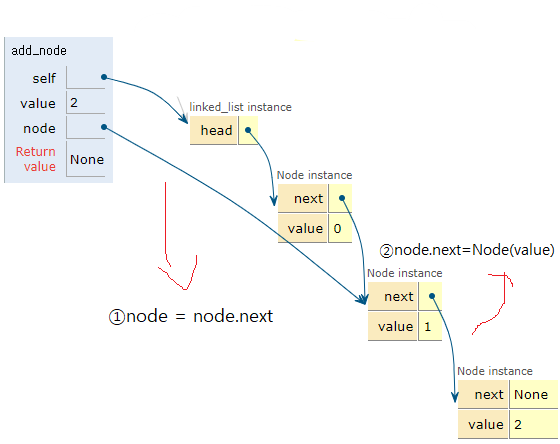

In [ ]:
# 앞부분이랑 같음
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

class linked_list:
    def __init__(self, value):
        self.head = Node(value)

    def add_node(self, value):
        if self.head == None:
            self.head = Node(value)
        else:
            node = self.head
            while node.next:
                node = node.next
            node.next = Node(value) # init함수의 value

# 연결리스트의 삭제구현
    def del_node(self, value):
        # 헤드가 없는경우
        if self.head == None:          
            return
        
        # 지울 값이 헤드벨류인 경우
        elif self.head.value == value: 
            temp = node                 # temp에 임시저장
            self.head = self.head.next  # 헤드노드 다음의 값을 헤드노드로 지정한 뒤
            del temp                    # 임시저장한 값을 제거한다.

        # 연결리스트의 헤드가 지울 값이 아닌 경우
        else:
            node = self.head  # 노드에 헤드노드를 설정한다.

            while node.next:  # 마지막 노드까지 탐색
                if node.next.value == value:   # 헤드노드의 다음 노드가 지울 값인 경우
                    temp = node.next           # 헤드노드의 다음 노드를 임시저장
                    node.next = node.next.next # 헤드노드의 next를  그 다음노드에 연결
                    del temp # 임시 저장한 값을 삭제한다.
                    return
                
                else: # 노드의 다음값이 내가 찾는 값이 아닐 경우
                    node = node.next # 기준 노드를 head노드에서 다음노드로 변경
                

    # 연결리스트의 노드출력을 위한 기능
    # node.next값이 None이면 반복이 멈추어 노드값이 모두 출력됨
    def ord_desc(self):
        node = self.head
        while node:
              print(node.value)
              node = node.next 

    # 연결리스트 검색함수
    def search_node(self, value):
        # 노드에 헤드노드를 설정한다.
        node = self.head
        while node:
            if node.value == value:
              return node
            else:
              node = node.next

In [ ]:
# # 노드 삽입 테스트
# linkedlist = linked_list(0)

# for value in range(1, 10):
#     linkedlist.add_node(value)

# # 노드 출력 함수
# linkedlist.ord_desc()

0
1
2
3
4
5
6
7
8
9


In [ ]:
# # 삭제함수
# linkedlist = linked_list(0) # 노드 초기값 설정
# for value in range(1,5):
#     linkedlist.add_node(value)
# linkedlist.del_node(3)  # 노드삭제
# linkedlist.ord_desc()

0
1
2
4


In [ ]:
# # search 함수
# linkedlist = linked_list(0) # 연결리스트 초기화

# # 연결리스트에 노드 다시 추가
# for value in range(1,11):
#     linkedlist.add_node(value)

# node = linkedlist.search_node(4)
# print(node.value)
# print(node.next.value)  

4
5


### 큐(Queue)

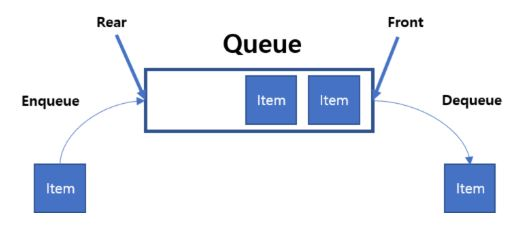

- FIFO(First In First Out) : 선입선출식 자료구조
- Enqueue : 대기열 입력 = Rear가 가르킴
- Dequeue : 대기열 출력 = Front가 가르킴
- 삽입과 삭제가 빠르다.
- 탐색이 비효율적이고 가장 앞쪽 원소만 접근가능


#### 연결리스트를 이용한 큐 

In [ ]:
# 연결리스트 + 큐 
class LinkedListNode:         
    def __init__(self, data):
        self.data = data
        self.next = None

class Queue:
    def __init__(self):
        self.front = None # 가리킬 빈 값
        self.rear = None  # 가리킬 빈 값

    # 큐에 값 넣기
    def enqueue(self, item):
        new_node = LinkedListNode(item) # 새로운 연결리스트노드 생성

        if self.rear is None:     # 큐가 비었으면
            self.front = new_node # front가 연결리스트 가르킴
            self.rear = new_node  # rear도 연결리스트 가르킴

        else:                         # 큐에 값이 있으면
            self.rear.next = new_node # rear.next가 새노드를 가르킴(기존노드와 새노드를 연결)
            self.rear = new_node      # rear노드가 새노드를 가르킴(새노드가 rear노드가 됨)
        return new_node.data

    # 큐에서 값 빼기
    def dequeue(self):
        if self.front is not None:      # front가 있다면,           
            old_front = self.front      # old_front에 front를 임시저장
            self.front = old_front.next # front값을 다음 값으로 지정

        if self.front is None:          # front가 없다면
            self.rear = None            # 모두 출력된 것이기 때문에 rear도 None으로 만들어준다.

        return old_front.data           # 원래 front값 추출(추출되면서 삭제됨?)
    
    # 연결리스트의 노드출력을 위한 기능
    def ord_desc(self):
        node = self.front
        while node:
            print(node.data)
            node = node.next

In [ ]:
print('1,2 차례대로 추가하기:')
q = Queue()
q.enqueue(1)
q.enqueue(2)
q.ord_desc()

1,2 차례대로 추가하기:
1
2


In [ ]:
print('대기열에서 빼기:')
print(q.dequeue())
q.ord_desc()

대기열에서 빼기:
1
2


In [ ]:
class Queue():
    def __init__(self):
        """
        # 문제 1.
        Queue의 생성자 함수를 구현해주세요.
        Queue 생성시 데이터를 담을 공간을 만들어주세요.
        구현하시려는 로직에 맞게 해당 함수를 구현해주세요.
        아래 pass를 지워주시고 코드를 작성해주시면 됩니다. 
        """
        self.data = []


    def enqueue(self, item):
        """
        #. 문제 2.
        queue에 item 매개변수에 들어온 값을 집어넣는 메소드를 구현해주세요.
        input: item
            queue로 들어갈 값입니다.
        output: 
            반환값은 없습니다.
        아래 pass를 지워주시고 코드를 작성해주시면 됩니다. 
        """
        self.data.append(item)
        return item

    def dequeue(self):
        """
        #. 문제 3.
        queue 동작에 알맞게 값을 queue에서 삭제하는 메소드를 구현해주세요.
        input: 
            input은 없습니다.
        output: 
            queue동작에 맞게 queue에서 삭제된 값을 반환해주세요.
            만약 삭제한 값이 없다면 None을 반환해주세요.
        아래 pass를 지워주시고 코드를 작성해주시면 됩니다. 
        """
        if self.data:
            poped_node = self.data.pop(0)
            return poped_node
        else:
            return None


    def return_queue(self):
        """
        #. 문제 4.
        queue내부에 있는 값을 반환하는 메소드를 구현해주세요.
        input: 
            input은 없습니다.
        output: 
            queue내부에 있는 값을 리스트 형태로 반환해주세요.
        아래 pass를 지워주시고 코드를 작성해주시면 됩니다. 
        """
        return self.data

a = Queue()
a.enqueue('jinwoo')
a.enqueue('eunbi')
a.enqueue('gyeon')

a.dequeue()

a.return_queue()

['eunbi', 'gyeon']

#### deque(double-ended queue)
- deque(iterator,[,maxlen])
- 큐에서 양방향으로 데이터를 처리 
- 리스트를 사용한 큐 사용법 : https://docs.python.org/ko/3/library/collections.html#collections.deque


In [ ]:
from collections import deque

# maxlen = 고정 개수(뒤에서 n개만 남김)
queue = deque(["A", "B", "C","D"],3)
print(queue)
print('-----------------------')

queue = deque(["A", "B", "C","D"]) # maxlen없이

# append(str or 숫자 or iterator) : 단일 문자나 숫자 / iterator는 그대로 들어감
queue.append('right')
print(f"append : {queue}")
queue.appendleft({"left":"hi"})
print(f"appendleft : {queue}")
print('-----------------------')

# pop
queue.pop()
print(f"pop : {queue}")
queue.popleft()
print(f"popleft() : {queue}")
print('-----------------------')

# extend(iterator) : 여러개를 입력해도 모두 인자로 들어감(dict는 key만 들어감)
queue.extend(['ㄱ','ㄴ'])
print(f"extend() : {queue}")
queue.extendleft({1:2})
print(f"extendleft() : {queue}")
print('-----------------------------')

# remove(item), reverse()
queue.reverse()
print(f"reverse : {queue}")
queue.remove('B')
print(f"remove : {queue}")
print('-----------------------------')

# rotate(num) :  순서 앞으로 정수만큼 밀기
queue.rotate(-2)
print(f"rotate : {queue}")
queue.rotate(2)
print(f"rotate : {queue}")

# clear() : 삭제
# count(x) : x의 개수(x와 같은 요소의 개수)
# index(x, start,stop) : 첫번째 일치하는 값을 반환, 없으면 ValueError

deque(['B', 'C', 'D'], maxlen=3)
-----------------------
append : deque(['A', 'B', 'C', 'D', 'right'])
appendleft : deque([{'left': 'hi'}, 'A', 'B', 'C', 'D', 'right'])
-----------------------
pop : deque([{'left': 'hi'}, 'A', 'B', 'C', 'D'])
popleft() : deque(['A', 'B', 'C', 'D'])
-----------------------
extend() : deque(['A', 'B', 'C', 'D', 'ㄱ', 'ㄴ'])
extendleft() : deque([1, 'A', 'B', 'C', 'D', 'ㄱ', 'ㄴ'])
-----------------------------
reverse : deque(['ㄴ', 'ㄱ', 'D', 'C', 'B', 'A', 1])
remove : deque(['ㄴ', 'ㄱ', 'D', 'C', 'A', 1])
-----------------------------
rotate : deque(['D', 'C', 'A', 1, 'ㄴ', 'ㄱ'])
rotate : deque(['ㄴ', 'ㄱ', 'D', 'C', 'A', 1])


In [ ]:
# 연결리스트 디큐 구현
class Node:
    """
    Deque 클래스에서 사용할 Node 클래스입니다.
    작성된 코드를 수정하거나 삭제하지 마세요.
    """
    def __init__(self, value, next=None):
        self.value = value
        self.next = next


class Deque:
    def __init__(self):
        """
        아래 코드는 수정하지 마세요.
        작성된 코드의 의도를 생각해보며 문제를 풀어주세요.
        """
        self.top = None      # top이 뒤인듯
        self.bottom = None   # bottom이 앞임


    def append(self, item):
        """
        #. 문제 1.
        Deque에 item 매개변수로 들어온 값을 제일 마지막 노드로 집어넣는 메소드를 구현해주세요.

        input: item
            Deque로 들어갈 값입니다.
        output: 
            반환값은 없습니다.
        아래 pass를 지워주시고 코드를 작성해주시면 됩니다. 
        """
        new_node = Node(item)

        if self.top == None:        # 디큐에 데이터가 없을떈
            self.top = new_node     # 그냥 노드 넣어주면 됨
            self.bottom = new_node
        else:                        # 데이터가 있을땐
            self.top.next = new_node # 끝단 next에 데이터 넣고
            self.top = new_node      # 끝단이 새 노드임을 가르킴



    def appendleft(self, item):
        """
        #. 문제 2.
        Deque에 item 매개변수로 들어온 값을 제일 앞 노드로 집어넣는 메소드를 구현해주세요.

        input: item
            Deque로 들어갈 값입니다.
        output: 
            반환값은 없습니다.
        아래 pass를 지워주시고 코드를 작성해주시면 됩니다. 
        """
        new_node = Node(item)
        if self.bottom == None:    
            self.top = new_node
            self.bottom = new_node
        else:                           # 앞으로 데이터를 넣어야된다.
            new_node.next = self.bottom # 새 데이터의 next에 앞쪽 데이터를 연결
            self.bottom = new_node      # 앞단이 새 노드가 제일 앞임을 가르킴




    def pop(self):
        """
        #. 문제 3.
        Deque에 가장 뒤에 있는 값을 삭제하는 메소드를 구현해주세요.

        input: 
            input은 없습니다.
        output: 
            Deque에서 삭제된 값을 반환해주세요.
            만약 삭제한 값이 없다면 None을 반환해주세요.
        아래 pass를 지워주시고 코드를 작성해주시면 됩니다. 
        """
        if self.top == None:          # 데이터 없음 말고
            return None
        
        if self.bottom.next == None:   # 데이터가 1개일 때
            temp = self.bottom.value   # temp에 데이터 저장
            self.bottom = None         # 첫단 데이터참조 해제
            self.top = None            # 끝단 데이터참조 해제
            return temp
        
        node = self.bottom            # 데이터가 여러개일 때
        while node.next.next:         # 다다음 데이터의 next가 None인 값 찾기
            node = node.next          
        temp = node.next.value        # next = None인 노드의 value를 임시저장
        self.top = node               # 끝단을 재설정 node[-2]와 node.next[-1]가 있으면 -1는 제거할꺼니까 -2로 끝단 설정
        self.top.next = None          # 끝값 연결 끊기
        return temp

    def popleft(self):
        """
        #. 문제 4.
        Deque에 가장 앞에 있는 값을 삭제하는 메소드를 구현해주세요.
        input: 
            input은 없습니다.
        output: 
            Deque에서 삭제된 값을 반환해주세요.
            만약 삭제한 값이 없다면 None을 반환해주세요.
        아래 pass를 지워주시고 코드를 작성해주시면 됩니다. 
        """
        # 빈 경우
        if not self.bottom : return None
        # 한개인 경우
        if self.bottom.next is None :
            t = self.bottom.value
            self.bottom = None
            self.top = None
            return t
        # 여러개인 경우
        t = self.bottom.value
        self.bottom = self.bottom.next
        return t


    def ord_desc(self):
        """
        #. 문제 5.
        Deque 내부에 있는 값을 반환하는 메소드를 구현해주세요.

        input: 
            input은 없습니다.
        output: 
            Deque내부에 있는 값을 리스트 형태로 반환해주세요.
        아래 pass를 지워주시고 코드를 작성해주시면 됩니다. 
        """
        if self.top == None:
            return None
        data_list = []
        node = self.bottom
        while node:
            data_list.append(node.value)
            node=node.next
        return data_list

### 스택(Stack)

- Last In First Out, 가장 늦게 들어온게 가장 먼저 나간다 (= 컴퓨터 운영체제)
- 구조가 단순하여 구현이 쉽고 빠르다.(List 구현한다.) 
- 데이터를 순차적으로 보기 때문에 조회가 느리다.
- 스택 크기가 너무 커지면 overhead가 발생한다.➡ linked lst를 이용한 동적 할당으로 극복 할 수 있다.
- 선형구조 (자료 간 1대1의 관계) ↔ 비선형구조(tree): 1대N

In [ ]:
# 리스트를 활용한 스택
class Stack:
    def __init__(self):
        self.data = []      # 동적처리(리스트값이 정해져있지 않음, 대괄호만 선언 및 저장)

    def push(self, item):      # 입력함수
        self.data.append(item)

    def pop(self):             # 출력함수
        if len(self.data) > 0: # 함수에 값이 있으면 pop
            return self.data.pop()
        return "The stack is empty" # 없으면 없다고 통보
        

- top: 마지막 삽입된 원소의 위치
- push: 자료를 넣는다.
- pop: 자료를 꺼낸다
- is Empty: 공백 확인


In [ ]:
# 연결리스트를 활용한 스택
class LinkedListNode:
    def __init__(self, data):
        self.data = data
        self.next = None

class Stack:
    def __init__(self):
        self.top = None

    def push(self, data):                # 스택 삽입 함수
        new_node = LinkedListNode(data)  # 연결리스트 노드 생성

        new_node.next = self.top         # top노드
        # 신규 노드를 최상단에 삽입
        self.top = new_node
        return new_node.data

    def pop(self):
        # 스택이 비어있는지 확인
        if self.top is not None:
            # 최상단의 노드를 삭제할 노드로 삽입
            popped_node = self.top
            # 삭제할 노드 다음 노드를 최상단의 노드로 삽입
            self.top = popped_node.next
            # 삭제할 노드로부터 값 리턴
            return popped_node.data
            # 맨끝 노드를 향하던 주소 NULL처리

    # 연결리스트의 노드출력을 위한 기능
    def ord_desc(self):
        node = self.top
        while node:
            print(node.data)
            node = node.next

In [ ]:
# 스택에 내부적으로 값을 쌓고 pop하는 과정을 살펴본다.
s = Stack()

print('1,2,3 차례대로 추가하기:')
s = Stack()
s.push(1)
s.push(2)
s.push(3)
s.ord_desc()

print('대기열에서 빼기:')
s.pop()
s.ord_desc()

# NOTE 2 재귀함수, 트리구조

https://github.com/ev1025/ds-sa-recursion

In [ ]:
# 배열(arr)에 target이 있는지 조회

def linear_search(arr, target):

    for idx in range(len(arr)):
        if arr[idx] == target:
            return True
    return False

print(linear_search([1,2,3],1))
print(linear_search([1,2,3],4))

True
False


## Recursion(재귀)

- 수학적 사고를 기반으로 함수내에 함수를 재호출하는 로직
- 재귀호출은 스택의 개념이 적용 되어 Last In First Out이다.
- 반복적으로 함수를 호출하여 메모리를 많이 사용하지만, 복잡한 수학식은 재귀함수를 사용하는 것이 좋다.


**분할정복법**
- 하나의 문제를 분할하면서 해결하고 해결 후 다시 하나로 합치는 방법


재귀조건1 : 정지조건이 있어야한다(base case)

In [ ]:
# reverse sum(역순하여 더하기)
def sum_list(x):
    if len(x)==1:                       # 재귀조건1 기본케이스(정지조건)이 있어야한다.
        return x[0]
    return sum_list(x[1:]) + x[0]     
    # return x[-1] + sum_list(x[0:-1])   # 재귀함수의 위치에 따라 순서가 바뀐다

print(sum_list('abcd'))
print(sum_list([1,2,3,4]))

dcba
10


재귀조건2 : 추가조건과 기본케이스의 차이를 명확히한다.

In [ ]:
def sum_list(items):
    if len(items) == 1: # Base Case(항목이 1개인 경우가 기본 케이스)
        return items[0]
    elif len(items) > 1:
        print("items:", items[0:])
        return items[0] + sum_list(items[1:]) # items[:]는 한 항목씩 감소한다.
        
print("sum_list:", sum_list([2, 3, 4, 5]))

items: [2, 3, 4, 5]
items: [3, 4, 5]
items: [4, 5]
sum_list: 14


재귀조건3 : 반드시 자기 자신(함수)를 호출해야한다.

In [ ]:
def add_two(num): # 매개변수
    return num + 2  # 반환값

def add_four(num):  # 매개변수
    return add_two(add_two(num))  # 반환값으로 매개변수가 있는 함수를 넣는다.

print(add_two(2))
print(add_four(6))

4
10


- 파이썬 재귀깊이 제한은 1000이고, 도달하면 RecursionError 발생
- 재귀 깊이 변경 : https://docs.python.org/3/library/sys.html#sys.setrecursionlimit

In [ ]:
# 재귀 깊이 확인
import sys
print(sys.getrecursionlimit())

1000


In [ ]:
import sys
sys.setrecursionlimit(3500) # 재귀 깊이 3500으로 변경 

def sum_number(n):
    if n <= 0:
        return 0
    else:
        return n + sum_number(n-1)

print(sum_number(3000))

4501500


In [ ]:
def printStar(num, li) :
    if num ==0:
        return num
    else:
        printStar(num-1,li)
        li.append(num*'*')
        return li
printStar(5,[])

['*', '**', '***', '****', '*****']

In [ ]:
def printStar(num, li):
    if num == 0:
        return num

    li =[*'*' for i in range(1, num+1)]
    return li

printStar(5,[])

['*', '**', '***', '****', '*****']

#### 재귀함수 예제풀이

In [ ]:
# for i in range(1,8):
#     print(i * "★")

# 재귀
def star_print(n):
    if n < 1 :
        return 
    else:
        star_print(n-1)        # 재귀함수의 위치에 따라 순서가 바뀐다!
        return print(n * "★")
  
star_print(4)

In [ ]:
# # 출력 예시 반복문
# for i in range(0, 10):
#     if i == 0:
#         print("구구단 2단")
#     else:
#         print(f'2 * {i} = {2*i}')

# 재귀
def multi_table_2(n):
    if n==0:
        print(f'구구단 2단')
    else:
        multi_table_2(n-1)
        print(f' 2 * {n} = {n*2}')

multi_table_2(9)

In [ ]:
# 출력 예시 반복문
for i in range(5,-1,-1):
	  if i == 0:
		    print("발사")
	  else:
		    print(i, end=' ')

# 재귀
def countdown(n):
    if n == 0:
        print('발사')
    else:
        print(f"{n}",end=' ')
        countdown(n-1)

countdown(5)

In [ ]:
from ast import Return
"""
n~100 사이의 짝수를 구하고 싶습니다.
정수 n이 매개변수로 주어질 때, n~100 사이의 짝수를 반환하도록 함수를 완성해주세요.

제한사항
1<= n <= 100
# """
# # 출력 예시 반복문
# for i in range(85,101):
# 	  if i % 2 !=1:
# 		    print(i, end = ' ')

# 재귀
def even_num(n):
    if n >101:      
        return
    elif n%2==0:
        print(n, end=' ')
    even_num(n+1)

even_num(85)

## 트리(Tree)

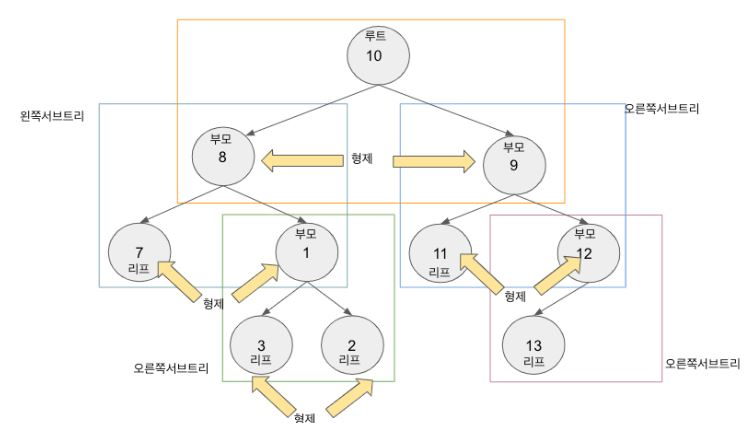

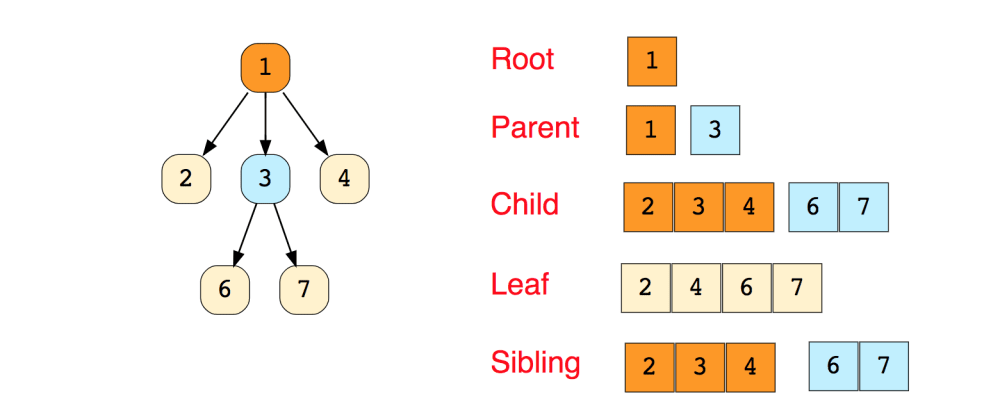

Root(뿌리) / Parent(부모) / Child(자식) / Leaf(잎) / Sibling(형제)

- 서브트리 : 자식노드이면서 부모노드인 트리
- 차수 : 노드가 갖고있는 자식노드의 최대 수(가로 노드 개수)
- 리프 : 각 트리의 가장 말단 노드
- 레벨 : 루트노드에서 얼마나 떨어졌는지(세로 노드 개수)
- 높이 : 루트노드에서 제일 많이 떨어진 노드의 레벨


### 이진트리(Binary Tree)

- 트리종류 중 가장 기본이 되는 트리모형
- 노드별 자식을 최대 2명(left, right)
- 서브트리의 노드가 반드시 값을 가질 필요는 없다.(null값으로 채우면 된다)


**포화이진트리(Perfect Binary Tree)** : 모든 리프노드의 레벨이 같은 트리
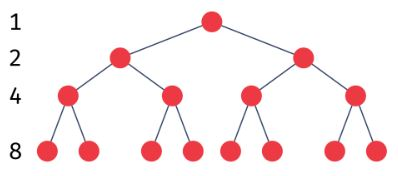

**완전이진트리(Full Binary Tree)** : 노드가 위에서 아래로, 왼쪽에서 오른쪽으로 채워져있다.   
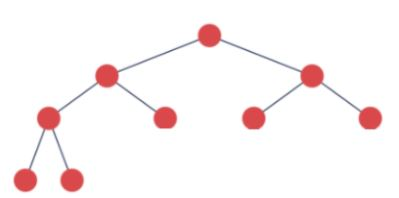

#### Binary Search Trees(BST) - 이진검색트리

- 노드가 정렬된 이진트리로 단순 이진트리보다 탐색을 빠르게 하기 위한 목적이다.(O(logn))
- 검색이 빠르므로 노드 삽입이 쉽다.
- 연결리스트를 참조해서 만들어진 개념으로 왼쪽에서 오른쪽으로 탐색한다.
- 루트노드의 값이 중심값이 아닌 경우, 한 쪽으로 치우쳐 질 수 있는데, 이 경우 O(n)의 시간복잡도를 가진다.
- 이를 해결하기 위해 Red Black Tree를 사용한다.(편향되면 자동으로 노드 위치를 업데이트)   

**BST 조건**
- 값 크기 조건 : 왼쪽 서브노드 < 루트노드 < 오른쪽 서브노드 
- 중복값이 없어야 한다.

**알고리즘** 
1. base_node는 처음에 root노드(head)를 참조하여 탐색을 진행한다.
2. 탐색값이 root노드가 아닐경우 value의 대소관계를 정해서 right나 left 노드를 참조하며 깊숙히 진행된다.
3. right나 left가 최종적으로 None를 가르키면 탐색은 종료된다.

In [ ]:
# 노드생성 클래스
class node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# 이진검색트리에 노드삽입함수 추가
class binary_search_tree:
    def __init__(self, head):      
        self.head = head            # root노드

    def insert_node(self, value):   # 노드삽입 함수
        self.base_node = self.head  # base노드가 root노드를 참조
        while True:
            if self.base_node.value > value:
                if self.base_node.left is not None:
                    self.base_node = self.base_node.left
                else:
                    self.base_node.left = node(value)
                    break
            else:                                         # 새 노드의 값이 base_node의 값보다 크면
                if self.base_node.right is not None:      # base_node.right가 None이 아니면. (= 넣을 공간이 없다)
                    self.base_node = self.base_node.right # base_node의 다음right를 참조(다음 반복을 위해서)
                else:
                    self.base_node.right = node(value)    # 위에서 right가 None인 노드를 찾다가 발견하면 새노드를 연결해준다.
                    break

head = node(1)
# node클래스에 노드생성(value=1,left와 right가 빈 노드)

bt = binary_search_tree(head)
# bt에 이진트리 저장
# self.head를 만들어서 위 head노드를 참조

bt.insert_node(2)
# self.base_node를 만들어서 head(root노드) 참조
# (while)반복해서 진행하라
# (if) 2가 루트노드 값보다 작은가? x(else로)
# (else)(if) self.base_node.right가 비어있지 않은가? x 비어있다.
# (else)(else) self.base_node.right가 비어있으니까 node(value)로 채워라.
# 채웠으면 끝내라.

bt.insert_node(3)
# self.base_node를 만들어서 head(root노드) 참조
# (while)반복해서 진행하라
# (if) 3가 루트노드 값보다 작은가? x(else로)
# (else)(if) self.base_node.right가 비어있지 않은가? o 비어있지 않다.
           # self.base_node = self.base_node.right 다음 right로 넘어간다(right is None까지 동작반복)
# (if) 3가 루트노드 값보다 작은가? x(else로)
# (else)(if) self.base_node.right가 None이 아닌가? x 비어있다.
# (else)(else) self.base_node.right가 비어있으니까 node(value)로 채워라.
# 채웠으면 끝내라.

In [ ]:
 # 노드 검색 함수
 # 위에 클래스에 넣어서 실행할 것
    def search_node(self, value):
        self.base_node = self.head # 기본 노드가 root를 참조한다

        while self.base_node:
            if self.base_node.value == value:         # root노드가 찾는 값이면 True 반환
                return True

            elif self.base_node.value > value:        # 찾는값(value)이 기본노드보다 작으면
                self.base_node = self.base_node.left  # base_node를 루트노드의 left노드(왼쪽자식노드)를 참조한다.

            elif self.base_node.value < value:        # 찾는값(value)이 기본노드보다 크면
                self.base_node = self.base_node.right # base_node를 루트노드의 right노드(오른쪽자식노드)를 참조한다. 

        return False  # 찾는 값이 없으면(base_node가 None을 참조했는데도 없으면! False를 반환)


# NOTE 3 탐색 및 정렬 알고리즘

https://github.com/ev1025/ds-sa-sort

### 탐색 알고리즘 기본(Search Algorithm Basic)

#### 선형검색(Linear search)

- 한 번에 하나씩 모두 검사하는 방법
- 반복문을 활용하여 배열의 수만큼 진행
- 시간 복잡도 O(n)

#### 이진 검색(Binary Search)

- 숫자를 반으로 나눠서 진행하여 선형보다 속도가 빠름
- 데이터가 정렬 된 경우에만 작동
- 시간 복잡도 O(logn)

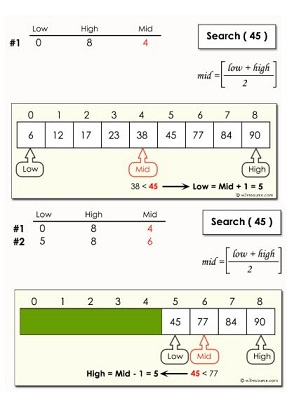

- low는 인덱스 0, high는 인덱스 len(리스트)-1 값을 참조한다.
- 중간값을 구해서 찾는 값이 중간값보다 크면 오른쪽, 작으면 왼쪽을 탐색한다.(시간이 반으로 줄어듬)

In [ ]:
# 이진검색
def test_binary_search(test_list, test_search_item):
    low = 0  # 인덱스 0 참조
    high = len(test_list) - 1  # 마지막 인덱스 참조(리스트길이 - 1)

    while low <= high:         
        middle = (low + high) // 2   # 중간값의 인덱스 참조
        search_value = test_list[middle] # search_value에 해당 리스트[중간값인덱스]를 참조

        if search_value == test_search_item: # 중간값이 찾는 값이면
            return middle                    # 중간값의 인덱스를 반환
        if search_value > test_search_item:  # 중간값이 찾는 값보다 크면
            high = middle - 1                # 중간의 왼쪽값을 수색하기 위해 최대값 조정
        else:                                # 중간값이 찾는값보다 작으면
            low = middle + 1                 # 중간의 오른쪽 값을 수색하기 위해 최소값 조정

    return '인덱스를 찾지 못함'   # 이진검색을 통해 값을 찾지 못하는 경우, 별도의 인덱스를 반환하지 않는다.

test_list = [6, 12, 17, 23, 38, 45, 77, 84]   # 이진검색의 조건에 적합하도록 이미 정렬된 리스트를 활용한다.
print('이진검색을 통해 검색된 리스트 인덱스:', test_binary_search(test_list, 12))

이진검색을 통해 검색된 리스트 인덱스: 1


### Iterative sorting(반복정렬)

#### 선택정렬(Selection sort)

- 왼쪽 노드부터 최소값을 1개씩 채워가는 과정
- 최소값을 찾기 위해 모든 노드를 탐색하여 시간이 오래걸림 O($n^2$)
- 서로 이웃하지 않은 노드를 교환하여 안정적이지 않음

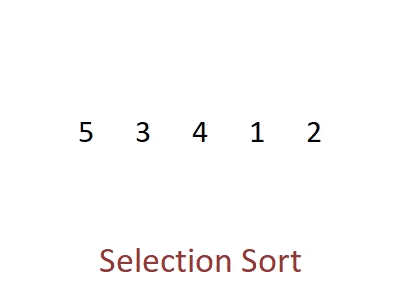

**순서**
1. 모든 노드를 돌면서 최소값을 찾는다 (n-1번)
2. 맨 왼쪽(첫번째 인덱스)값과 최소값을 바꿔준다.
3. 맨 왼쪽값을 제외하고, 최소값을 찾는다.(n-2번)
4. 왼쪽에서 2번째 값과 최소값을 바꿔준다.
=> 정렬 될 때까지 반복

In [ ]:
def selection_sort(items):
    for i in range(0, len(items) - 1): # 외부 루프(1:1비교를 하기때문에 비교를 1번 덜하게 되서 -1)
        left_index = i                 # 가장 왼쪽 인덱스 저장    
        min_index = left_index         # 최소값(기본값을 왼쪽값으로 저장)

        for j in range(left_index + 1, len(items)):  # 내부루프(맨 왼쪽값은 left_index에 저장되어있으니 제외+1)
            if items[min_index]>items[j]:            # 해당값이 최소값보다 작으면
                min_index = j                        # 최소값인덱스가 해당값을 참조(최소값탐색)
        
        # 최소값 탐색이 끝나면 왼쪽끝값과 최소값을 바꿔준다.(swap)
        items[left_index], items[min_index] = items[min_index], items[left_index]

        # 이건 다른 언어에서 바꾸는법
        # temp = items[smallest_index]
        # items[smallest_index] = items[cur_index]
        # items[cur_index]= temp 
        
    return items
    
our_numbers = [5, 9, 3, 6, 2, 1, 7, 8, 4]
print(selection_sort(our_numbers))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


#### 삽입정렬(Insertion Sort)

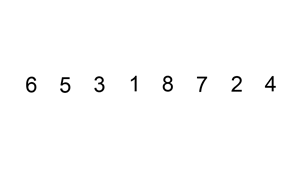

- 제일 왼쪽부터 시작해서 본인보다 왼쪽에 있는 모든 요소가 본인보다 큰지 확인하여 크면 왼쪽으로 이동
- 비교 후 삽입(변경)을 동시에 진행
- `소량의 데이터`를 정렬 할 때 효율적이다.
- 이미 정렬된 리스트의 경우 : O($n$)
- 오름차순정렬 된 리스트를 내림차순으로 바꾸는 경우 : O($n^2$)

In [ ]:
def ins_sort(li):
    for compare_index in range(1, len(li)): # 어차피 첫번째 값은 비교할 값이 없어서 1부터시작
        compare_value = li[compare_index]   # 기준노드(비교할 노드)값을 미리 저장
        prev_index = compare_index -1          # 기준노드의 이전노드의 인덱스

        # 이전 노드의 인덱스가 0이상, 기준노드가 이전노드보다 작은경우
        while prev_index >=0 and li[prev_index] > compare_value:
            li[prev_index+1] = li[prev_index] # 기준노드를 이전노드 값으로 채운다
            prev_index -= 1                         # 이전노드 인덱스를 하나내림(위 값 한칸씩 이동)
        li[prev_index+1]=compare_value           # 적절한 값에 기준노드를 채워준다.
    return li

# 더 빠르긴 한데 약간 버블정렬의 느낌
# def insertion_sort(li):
#     for i in range(1, len(li)):
#         while i > 0 and li[i - 1] > li[i]: # 이중 for문 할 때보다 연산을 짧게함
#             li[i - 1], li[i] = li[i], li[i - 1]
#             i -= 1
#     return li

In [ ]:
# 직접구현한 스챌코드(내림차순)
def insertionSort(li):
    for base_index in range(1,len(li)):
        base_node = li[base_index]
        pre_index = base_index-1

        while pre_index>=0 and base_node >li[pre_index]:
            li[pre_index+1] = li[pre_index]
            pre_index -=1

        li[pre_index+1] = base_node


    return li
insertionSort([4,5,6,23,1])

[23, 6, 5, 4, 1]

#### 버블정렬


- 왼쪽부터 서로 이웃한 두 원소의 크기를 비교하여 교환을 반복 (=단순교환정렬)
- 가장 간단하지만 가장 비효율적인 알고리즘
- 오름차순 정렬이 될 때까지 모든 항목에 반복작업
- 목록이 정렬되어있어도 모든 항목을 검사 (비교횟수 : $n*(n-1)/2$)
- 배열 전체를 쭉 살펴보는 과정이 있어서 O($n^2$)
- 이웃노드만 교환하여 안정적이다.

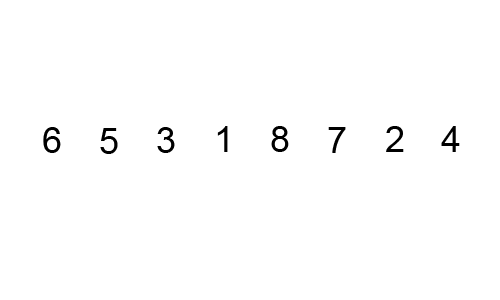

In [ ]:
def bubble_sort(li):
    length = len(li) - 1
    for i in range(length):
        print(i)
        for j in range(length - i):
            print(j, j+1)
            if li[j] > li[j+1]:
                li[j+1], li[j] = li[j], li[j+1]
    return print(li)

li = [3,5,4,2,1]
bubble_sort(li)

0
0 1
1 2
2 3
3 4
1
0 1
1 2
2 3
2
0 1
1 2
3
0 1
[1, 2, 3, 4, 5]


In [ ]:
# 직접구현한 스챌코드(내림차순)
def bubbleSort(li) :
    len_li = len(li)-1          # 앞뒤 비교 모두 하면 1번 남아서 -1
    for i in range(len_li):     # 한 번 돌 때마다 끝값 1개씩 채우고, 제외시키고 반복시작
        for j in range(len_li-i): # 앞,뒤 값의 크기를 비교해서 바꿔준다.(결국 제일 끝값부터 하나씩 채워짐 => -i)
            if li[j]  < li[j+1]:
                li[j], li[j+1] = li[j+1], li[j]
    return li

li = [3,5,4,2,1]
print(bubbleSort(li))

[5, 4, 3, 2, 1]


### 안정정렬과 불안정정렬

**안정정렬(stable)** 
- 동일한 값이 있을 때, 순서를 유지해주는 정렬
- 버블정렬, 삽입정렬은 정렬된 값에 대해선 이동을 하지 않기 때문에 순서가 바뀔 염려가 없다.

**불안정정렬(unstable)**
- 동일한 값이 있을 때 순서유지가 어려운 정렬
- 선택정렬, 정렬된 값끼리 순서가 바뀔수 있다(같은 값이라도 메모리주소 값이 다를 수 있다.)

# NOTE 4 Divide and conquer

https://github.com/ev1025/ds-sa-divideandconquer

## Divide and conquer(분할정복)

- 복잡한 문제를 여러개로 나누어서 풀고 다시 합치는 방법
- 병렬적으로 문제를 해결할 수 있지만, 문제 해결과정에서 함수가 재귀적으로 호출되어 메모리 사용이 크다.


**분할정복 조건**
- 기본케이스(base case)를 가지고 있어야한다.(분할 할 수 없을 때 그만 해야되니까)
- 문제를 서브문제로 분할 할 수 있다 => Divide
- 서브문제를 정복(Conquer)했다 => Merge

#### 퀵정렬(Quick Sort)

- 피벗이라는 별도 노드를 지정해두고 재귀적으로 수행하여 통상적으로 병합정렬보다 빠름
- 한정적인 범위에서 데이터를 정리하기 때문에 캐시를 덜 활용하여 하드웨어적으로 효율적이다.
- 성능의 편차가크고 피벗의 설정이 어려워서 잘 사용하지 않음
- 평균 O($nlogn$) / 최악 : O($n^2$) 


**순서**
1. 파티션분할 함수 생성
2. 파티션분할 함수로 피벗을 생성하여 피벗을 중심으로 양옆을 나눈다.(파티션)
3. 나누어진 영역을 중심으로 재귀호출을 진행하는 분할정복구조

In [ ]:
# 기본 퀵정렬
def quick_sort(li,first, last):
    def partition(first, last): # 피벗의 왼쪽과 오른쪽으로 나눔
        pivot_value = li[last]  # 피벗노드 값은 끝값
        left = first            # left = 왼쪽값을 채워주기 위한 인덱스

        for right in range(first, last): # 리스트에서
            if li[right] < pivot_value:  # 값이 피벗노드보다 작으면
                li[left], li[right] = li[right], li[left] # 왼쪽으로 swap
                left += 1 # 왼쪽인덱스 하나 추가했으니 다음 칸이동
        li[left], li[last] = li[last], li[left] # 반복문으로 왼쪽에 다 옮긴 후 마지막 left에 피벗 놓기
                                                # li[right]대신 피봇을 쓰면 li가 바뀌는게 아니라서 안됨!              
        return left   # 밑의 if문의 pivot으로 들어갈 인덱스 반환

        
    if first < last:                   # quick_sort함수의 시작점, 인자가 1개 남으면 first=0, last =0이 되어서 False
        pivot_idx = partition(first, last) # 파티션을 나눈다.
        quick_sort(li, first, pivot_idx-1) # pivot의 왼쪽 list (여기의 pivot은 인덱스의미)
        quick_sort(li, pivot_idx+1, last)  # pivot의 오른쪽 list (피봇은 나눌필요 없으므로 -+해줌)

    return li



quick_sort([4,5,6,71,2,3,4,5,7],0,8)

[2, 3, 4, 4, 5, 5, 6, 7, 71]

In [ ]:
# 리스트컴프리헨션
def quick_sort(li):
    if len(li) <= 1: # 값이 1개 남으면 바로 출력(base)
        return li

    pivot = li[0]    # 피봇값 설정

    # 중복값을 처리하기 위해 하나에는 등호 필수
    leftside = [i for i in li[1:] if i <= pivot] # 피봇보다 작은 값을 모은 리스트 
    rightside = [i for i in li[1:]if i > pivot]  # 피봇보다 큰 값을 모은 리스트

    return quick_sort(leftside) + [pivot] + quick_sort(rightside)


quick_sort([4,5,6,71,2,3,4,5,7])

[2, 3, 4, 4, 5, 5, 6, 7, 71]

#### 병합정렬 (Merge Sort)

- 반으로 나눈 뒤처음과 끝을 계속해서 탐색하는 정렬
- 1까지 나눈 뒤 정렬하면서 merge를 진행
- 퀵정렬보다 빠르진 않지만 안정정렬이라 중복데이터의 영향을 덜받음
- 항상 O($nlogn$)

In [ ]:
# 합치는 함수
def merge(left, right): 
    output = []         # 정리시킬 리스트
    i=j=0               # 각 값의 인덱스

    while i < len(left) and j < len(right): # 왼쪽이나 오른쪽 리스트가 소진될때까지 돌아라
        if left[i] < right[j]:              # 왼쪽[i]와 오른쪽[j]의 토너먼트
            output.append(left[i])          # 왼쪽 값이 크면 output에 먼저 추가
            i += 1                          # 다음 왼쪽값을 출력하기위해
        else:
            output.append(right[j])         # 오른쪽값이 크면 output에 추가
            j += 1

    output.extend(left[i:])   # while문에서 왼쪽먼저 소진될지 오른쪽 먼저 소진될지 모르니까 나머지 추가
    output.extend(right[j:])  # 왼쪽과 오른쪽은 합치기 전에 정렬이 되어있으니 두개 다 넣는듯

    return output

In [ ]:
# 나눠서 정렬하는 함수 
def merge_sort(li):

    list_len = len(li) # 리스트 길이 저장

    if list_len == 1:    # base설정
        return li     

    midle = list_len//2  # 중간지점

    left_side = merge_sort(li[:midle]) # 중간의 왼쪽구간
    right_side = merge_sort(li[midle:])# 중간의 오른쪽 구간

    return merge(left_side, right_side) # 정렬된 값을merge함수에 넣어주기

In [ ]:
# 정렬이 잘되는지 확인
merge_sort([2,5,4,3,6,7,9])

[2, 3, 4, 5, 6, 7, 9]